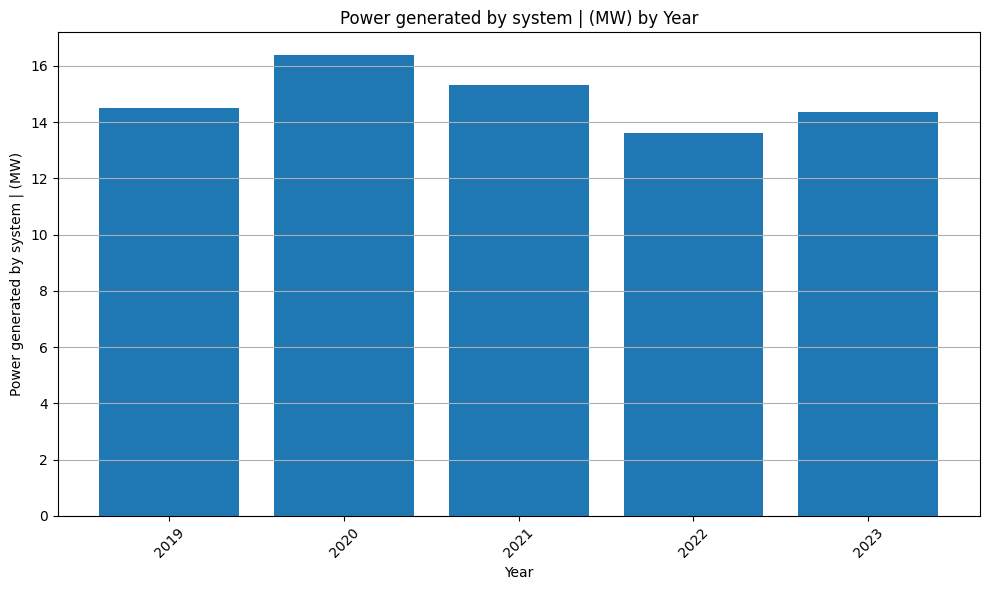

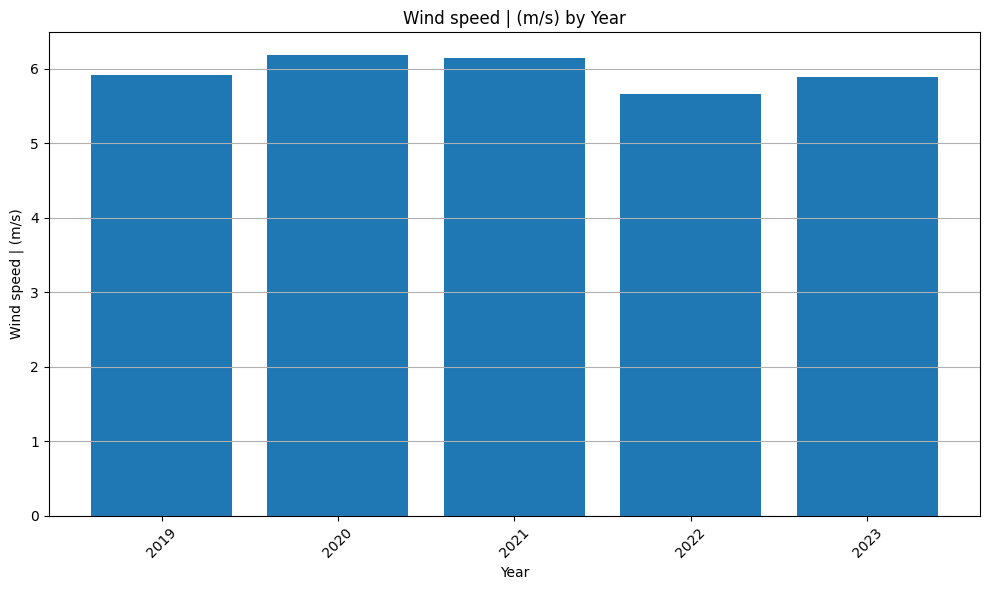

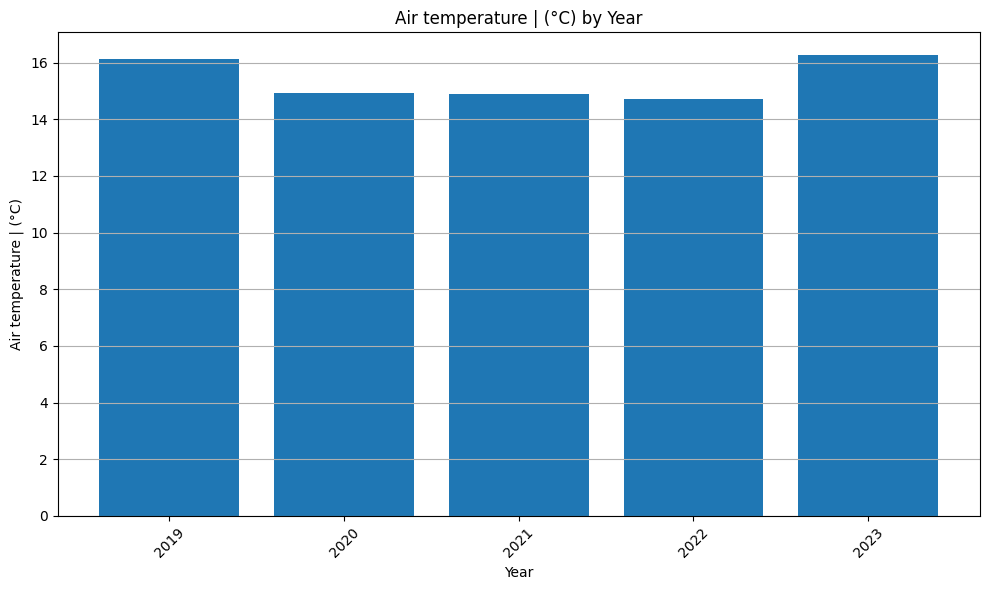

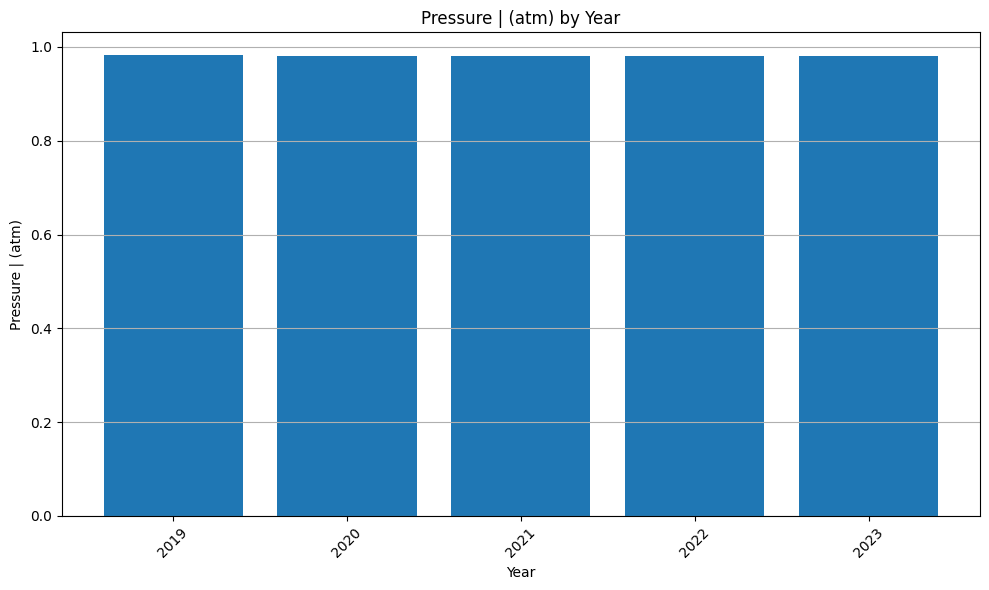

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to your Excel file (replace with your actual path)
file_path = "/content/merged_data__latest.xlsx"

# Read the data from the Excel sheet
data = pd.read_excel(file_path)

# Extract the date and time column (assuming it's named "DateTime")
date_time = data["DateTime"]

# Extract the year from the date and time column
years = pd.to_datetime(date_time).dt.year

def create_histogram(data_column, y_label):
  """
  Creates a histogram for a specific data column with year on x-axis and y_label on y-axis.
  """
  # Calculate yearly sums (modify if needed)
  year_data = data.groupby(years)[data_column].mean()
  years_for_hist = year_data.index.to_numpy()
  data_for_hist = year_data.to_numpy()

  # Create the histogram
  plt.figure(figsize=(10, 6))
  plt.bar(years_for_hist, data_for_hist)
  plt.xlabel("Year")
  plt.ylabel(y_label)
  plt.title(f"{y_label} by Year")
  plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
  plt.grid(axis="y")
  plt.tight_layout()
  plt.show()

# Create histograms for Power Generated, Wind Speed, and Air Temperature
create_histogram("Power generated by system | (MW)","Power generated by system | (MW)")
create_histogram("Wind speed | (m/s)","Wind speed | (m/s)")
create_histogram("Air temperature | (°C)","Air temperature | (°C)")
create_histogram("Pressure | (atm)","Pressure | (atm)")


In [ ]:
import pandas as pd

# Define the path to your Excel file (replace with your actual path)
file_path = "/content/merged_data__latest.xlsx"

# Read the data from the Excel sheet
data = pd.read_excel(file_path)

# Select relevant columns and convert date/time to datetime format (assuming specific column names)
date_time = pd.to_datetime(data["DateTime"], infer_datetime_format=True)  # Adjust format if needed
power_generated = data["Power generated by system | (MW)"]
air_temperature = data["Air temperature | (°C)"]
air_pressure = data["Pressure | (atm)"]
wind_speed = data["Wind speed | (m/s)"]

# Filter data for years 2019 to 2023 and hourly granularity
filtered_data = data[(data["DateTime"].dt.year >= 2019) & (data["DateTime"].dt.year <= 2023) & (data["DateTime"].dt.minute == 0)]# Extract features (consider additional features based on domain knowledge)
features = {
    "power_generated": power_generated,
    "air_temperature": air_temperature,
    "air_pressure": air_pressure,
    "wind_speed": wind_speed
}

# Optional: Feature engineering (e.g., hourly averages/statistics for non-hourly data)
# ... (Add logic here if needed)

# You now have the features in a dictionary named 'features'

# Determining optimal features often requires analysis and experimentation
# Here are some general considerations:
# - **Feature relevance:** Do the features have a logical connection to power generation from a windmill?
# - **Feature correlation:** Are the features highly correlated with each other? Removing redundant features can improve model performance.
# - **Feature selection techniques:** You can use techniques like feature importance scores from machine learning models to identify the most impactful features.

print("Extracted features:", features.keys())

# Use the 'features' dictionary for further analysis or machine learning tasks


Extracted features: dict_keys(['power_generated', 'air_temperature', 'air_pressure', 'wind_speed'])


<ipython-input-7-5ad505b4c46d>:10: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  date_time = pd.to_datetime(data["DateTime"], infer_datetime_format=True)  # Adjust format if needed


In [ ]:
if not date_time.dt.is_hourly:
  hourly_data = filtered_data.set_index(date_time).resample('H')
  power_generated = hourly_data["Power Generated by System (MW)"]
  air_temperature = hourly_data["Air Temperature (°C)"].fillna(method='ffill')  # Forward fill for missing values
  air_pressure = hourly_data["Air Pressure (atm)"].fillna(method='ffill')  # Forward fill for missing values
  wind_speed = hourly_data["Wind Speed (m/s)"].fillna(method='ffill')  # Forward fill for missing values
else:
  # Data already in hourly granularity, use the existing variables
  pass

# Extract features
features = {
    "power_generated": power_generated,
    "air_temperature": air_temperature,
    "air_pressure": air_pressure,
    "wind_speed": wind_speed
}


AttributeError: 'DatetimeProperties' object has no attribute 'is_hourly'

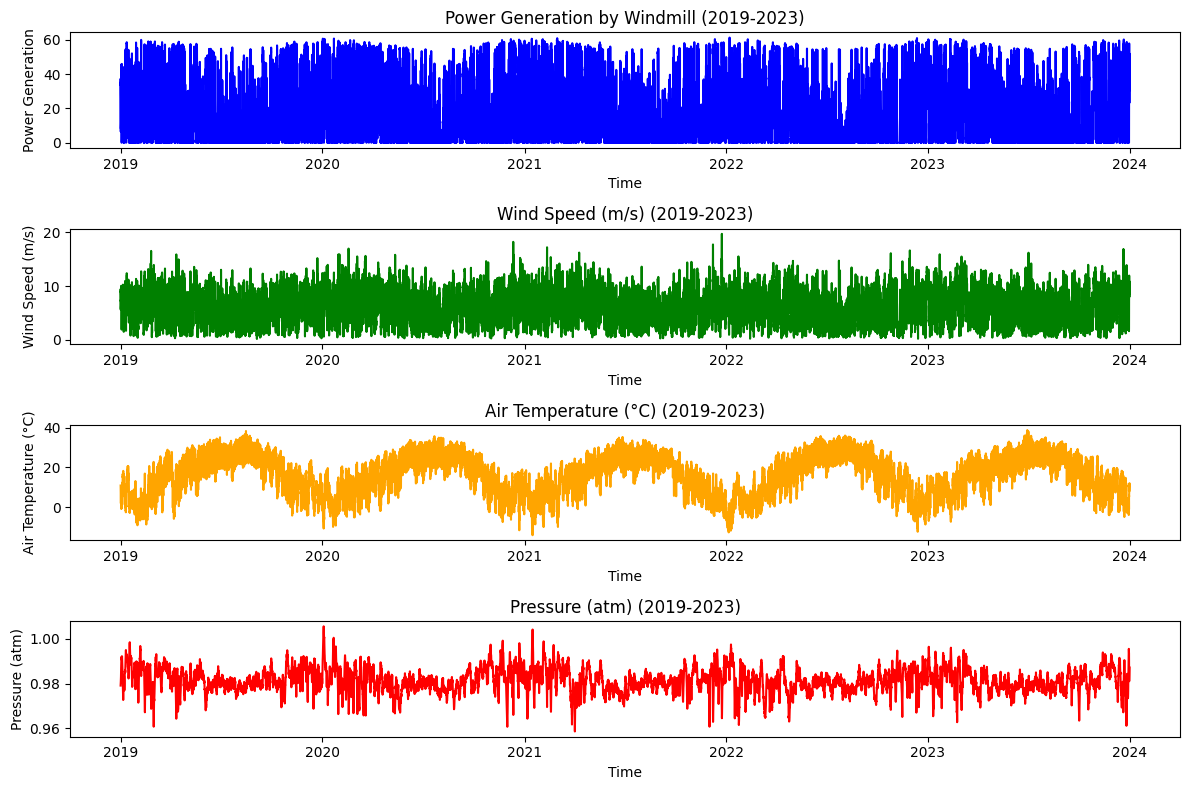

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a CSV file named 'windmill_data.csv' containing your dataset
# Load the dataset
data = pd.read_excel('/content/merged_data__latest.xlsx')

# Convert the 'Timestamp' column to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Filter data for the years 2019 to 2023
data = data[(data['DateTime'].dt.year >= 2019) & (data['DateTime'].dt.year <= 2023)]

# Set the 'Timestamp' column as the index
data.set_index('DateTime', inplace=True)

# Plotting
plt.figure(figsize=(12, 8))

# Power generation
plt.subplot(4, 1, 1)
plt.plot(data['Power generated by system | (MW)'], color='blue')
plt.title('Power Generation by Windmill (2019-2023)')
plt.xlabel('Time')
plt.ylabel('Power Generation')

# Wind speed
plt.subplot(4, 1, 2)
plt.plot(data['Wind speed | (m/s)'], color='green')
plt.title('Wind Speed (m/s) (2019-2023)')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')

# Air temperature
plt.subplot(4, 1, 3)
plt.plot(data['Air temperature | (°C)'], color='orange')
plt.title('Air Temperature (°C) (2019-2023)')
plt.xlabel('Time')
plt.ylabel('Air Temperature (°C)')

# Pressure
plt.subplot(4, 1, 4)
plt.plot(data['Pressure | (atm)'], color='red')
plt.title('Pressure (atm) (2019-2023)')
plt.xlabel('Time')
plt.ylabel('Pressure (atm)')

plt.tight_layout()
plt.show()


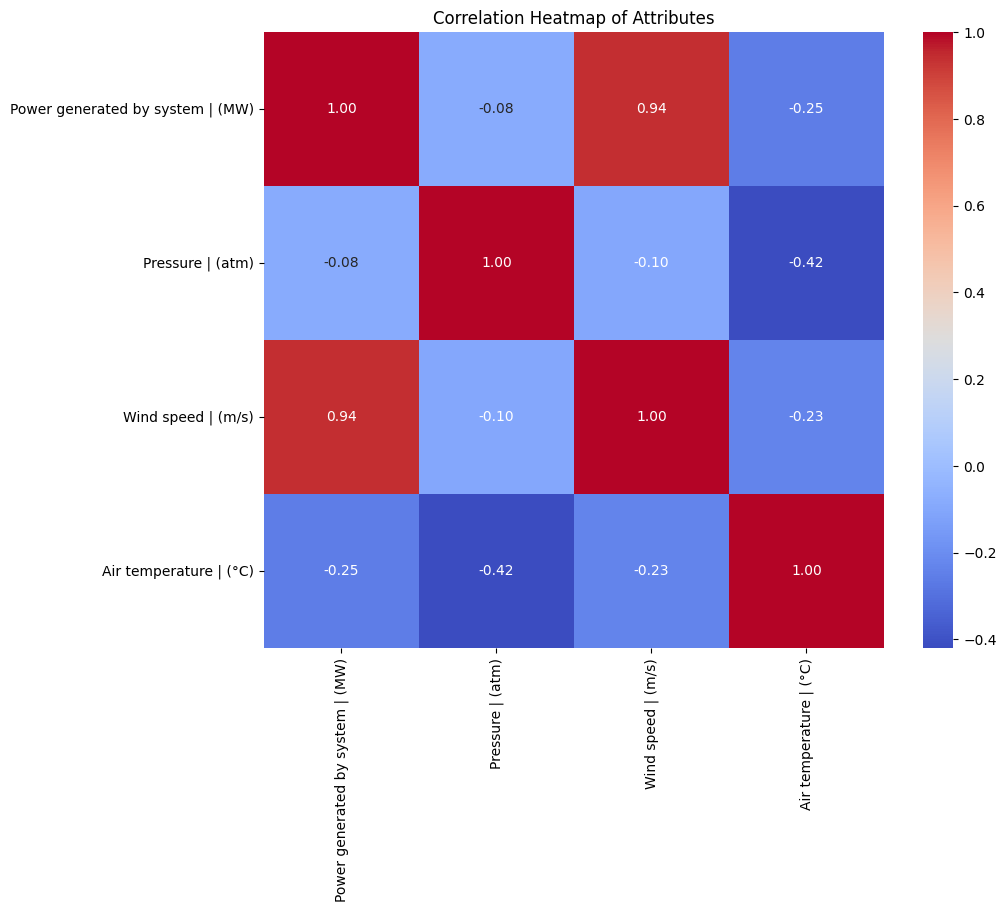

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_excel('/content/merged_data__latest.xlsx')

# Convert the 'DateTime' column to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Filter data for the years 2019 to 2023
data = data[(data['DateTime'].dt.year >= 2019) & (data['DateTime'].dt.year <= 2023)]

# Drop the 'DateTime' column as it is not needed for correlation analysis
data = data.drop(columns=['DateTime'])

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Attributes')
plt.show()


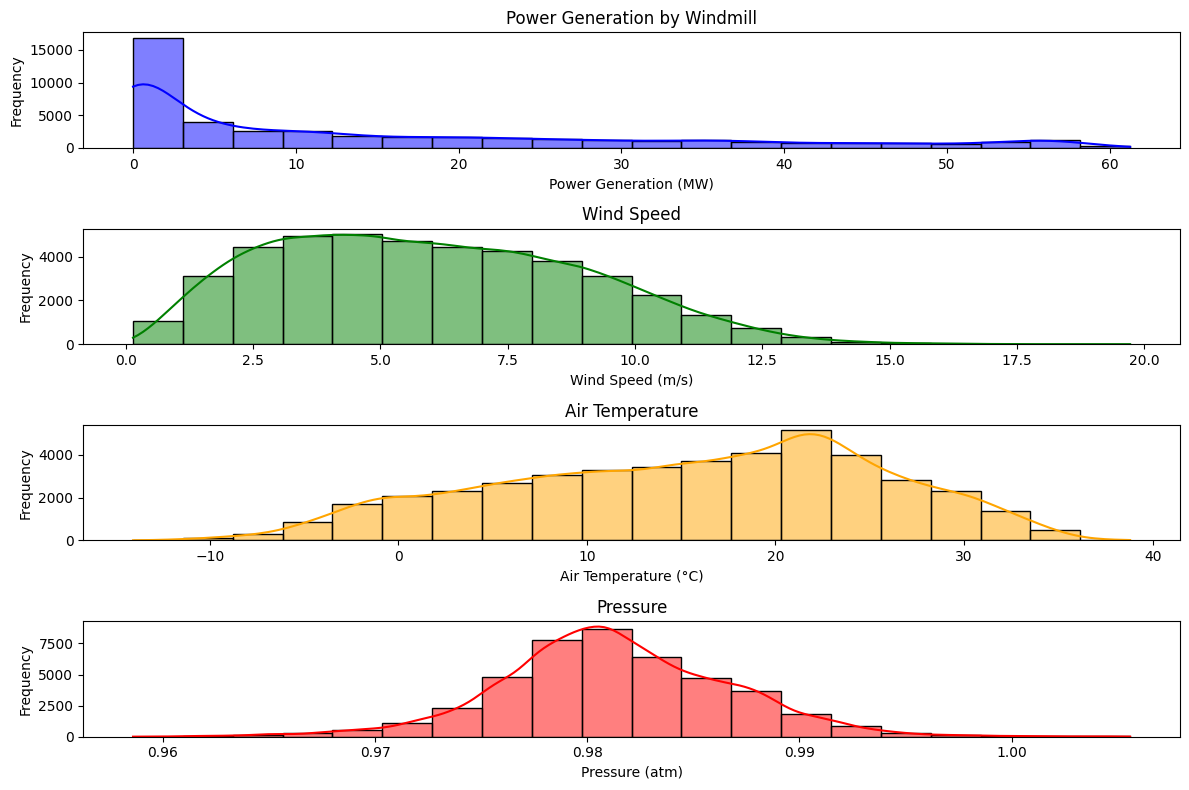

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_excel('/content/merged_data__latest.xlsx')

# Convert the 'DateTime' column to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Filter data for the years 2019 to 2023
data = data[(data['DateTime'].dt.year >= 2019) & (data['DateTime'].dt.year <= 2023)]

# Drop the 'DateTime' column as it is not needed for histograms
data = data.drop(columns=['DateTime'])

# Plotting histograms for each attribute
plt.figure(figsize=(12, 8))

# Power generation
plt.subplot(4, 1, 1)
sns.histplot(data['Power generated by system | (MW)'], color='blue', bins=20, kde=True)
plt.title('Power Generation by Windmill')
plt.xlabel('Power Generation (MW)')
plt.ylabel('Frequency')

# Wind speed
plt.subplot(4, 1, 2)
sns.histplot(data['Wind speed | (m/s)'], color='green', bins=20, kde=True)
plt.title('Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')

# Air temperature
plt.subplot(4, 1, 3)
sns.histplot(data['Air temperature | (°C)'], color='orange', bins=20, kde=True)
plt.title('Air Temperature')
plt.xlabel('Air Temperature (°C)')
plt.ylabel('Frequency')

# Pressure
plt.subplot(4, 1, 4)
sns.histplot(data['Pressure | (atm)'], color='red', bins=20, kde=True)
plt.title('Pressure')
plt.xlabel('Pressure (atm)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


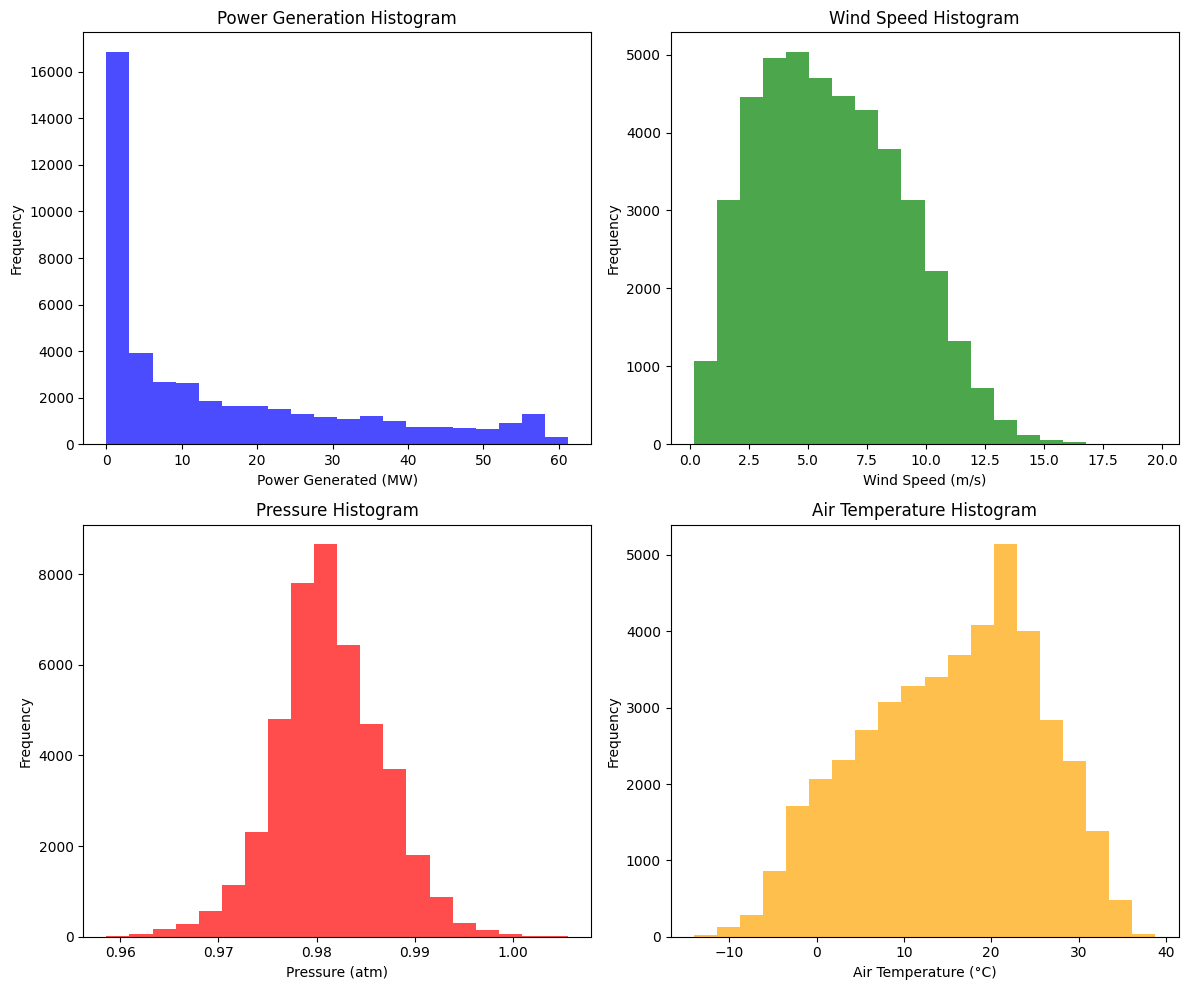

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('/content/merged_data__latest.xlsx')

# Convert the 'DateTime' column to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Plotting histograms
plt.figure(figsize=(12, 10))

# Power generation histogram
plt.subplot(2, 2, 1)
plt.hist(data['Power generated by system | (MW)'], bins=20, color='blue', alpha=0.7)
plt.title('Power Generation Histogram')
plt.xlabel('Power Generated (MW)')
plt.ylabel('Frequency')

# Wind speed histogram
plt.subplot(2, 2, 2)
plt.hist(data['Wind speed | (m/s)'], bins=20, color='green', alpha=0.7)
plt.title('Wind Speed Histogram')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')

# Pressure histogram
plt.subplot(2, 2, 3)
plt.hist(data['Pressure | (atm)'], bins=20, color='red', alpha=0.7)
plt.title('Pressure Histogram')
plt.xlabel('Pressure (atm)')
plt.ylabel('Frequency')

# Air temperature histogram
plt.subplot(2, 2, 4)
plt.hist(data['Air temperature | (°C)'], bins=20, color='orange', alpha=0.7)
plt.title('Air Temperature Histogram')
plt.xlabel('Air Temperature (°C)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


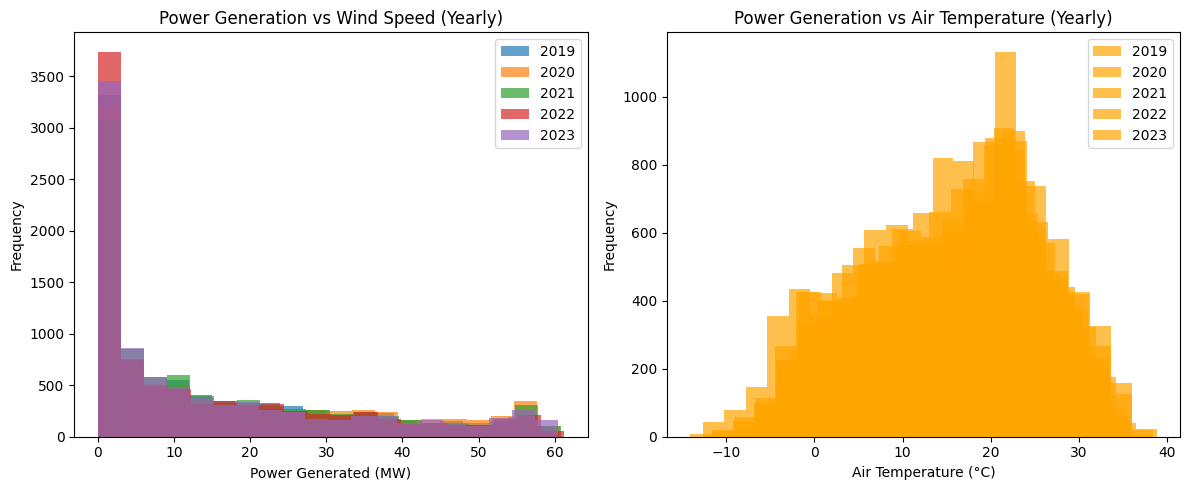

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('/content/merged_data__latest.xlsx')

# Convert the 'DateTime' column to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Extract year from DateTime
data['Year'] = data['DateTime'].dt.year

# Plotting histograms
plt.figure(figsize=(12, 5))

# Power generation vs Wind speed on yearly basis
plt.subplot(1, 2, 1)
for year in sorted(data['Year'].unique()):
    year_data = data[data['Year'] == year]
    plt.hist(year_data['Power generated by system | (MW)'], bins=20, alpha=0.7, label=str(year))
plt.title('Power Generation vs Wind Speed (Yearly)')
plt.xlabel('Power Generated (MW)')
plt.ylabel('Frequency')
plt.legend()

# Power generation vs Air temperature on yearly basis
plt.subplot(1, 2, 2)
for year in sorted(data['Year'].unique()):
    year_data = data[data['Year'] == year]
    plt.hist(year_data['Air temperature | (°C)'], bins=20, alpha=0.7, label=str(year), color='orange')
plt.title('Power Generation vs Air Temperature (Yearly)')
plt.xlabel('Air Temperature (°C)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


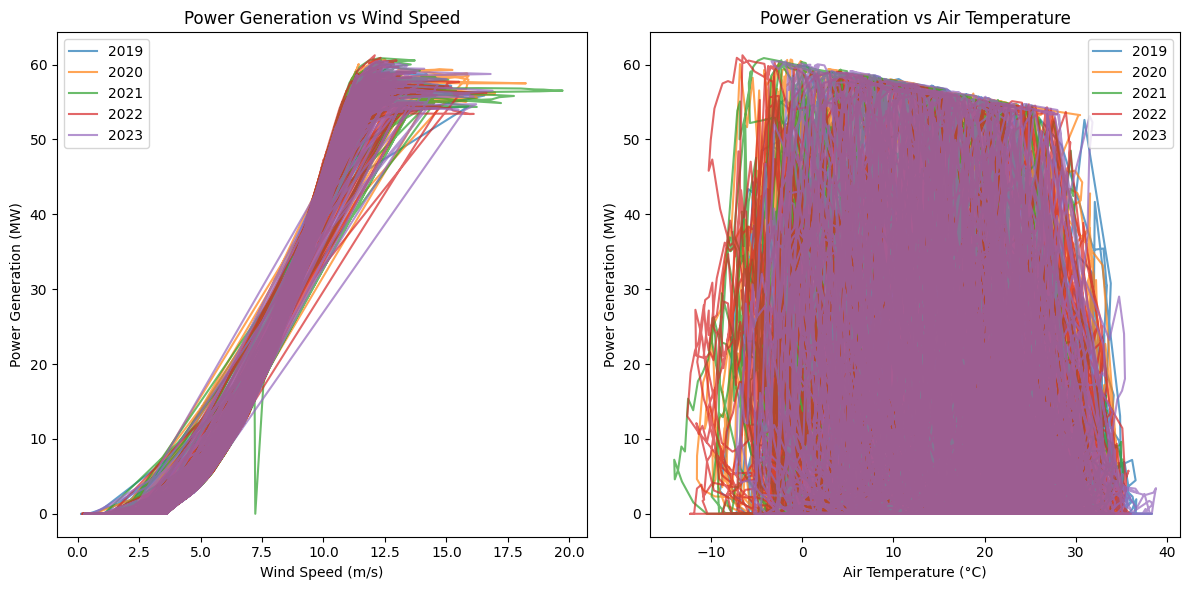

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('/content/merged_data__latest.xlsx')

# Convert the 'DateTime' column to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Extract year from DateTime
data['Year'] = data['DateTime'].dt.year

# Plotting power generation vs wind speed and power generation vs air temperature
plt.figure(figsize=(12, 6))

# Power generation vs Wind speed
plt.subplot(1, 2, 1)
for year in sorted(data['Year'].unique()):
    subset = data[data['Year'] == year]
    plt.plot(subset['Wind speed | (m/s)'], subset['Power generated by system | (MW)'],
             label=year, alpha=0.7)
plt.title('Power Generation vs Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power Generation (MW)')
plt.legend()

# Power generation vs Air temperature
plt.subplot(1, 2, 2)
for year in sorted(data['Year'].unique()):
    subset = data[data['Year'] == year]
    plt.plot(subset['Air temperature | (°C)'], subset['Power generated by system | (MW)'],
             label=year, alpha=0.7)
plt.title('Power Generation vs Air Temperature')
plt.xlabel('Air Temperature (°C)')
plt.ylabel('Power Generation (MW)')
plt.legend()

plt.tight_layout()
plt.show()


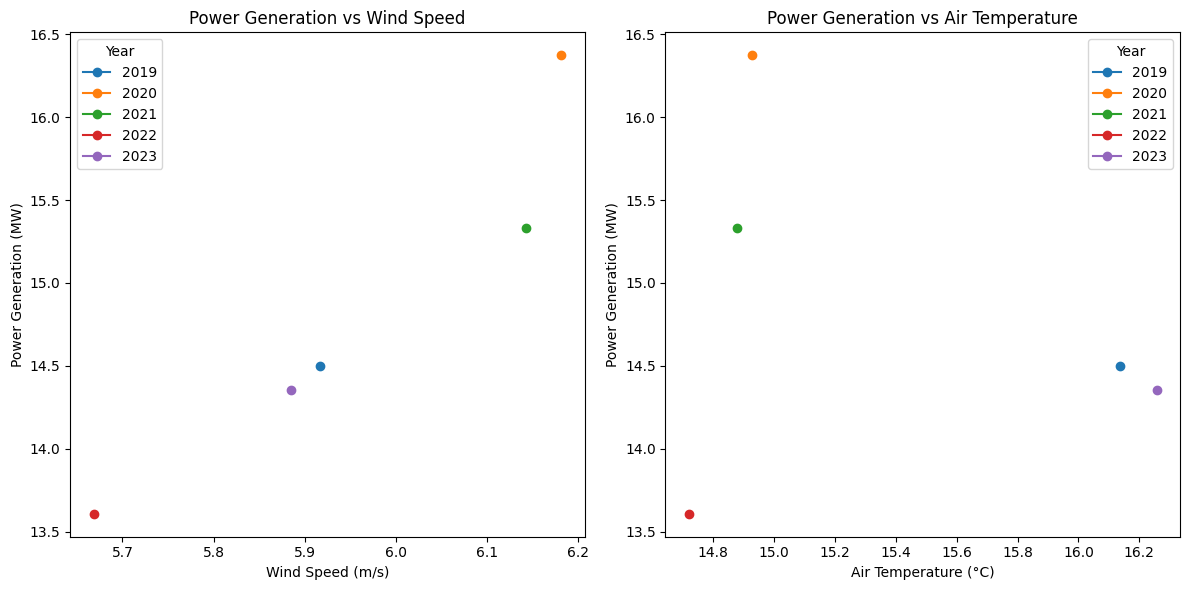

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('/content/merged_data__latest.xlsx')

# Convert the 'DateTime' column to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Extract year from DateTime
data['Year'] = data['DateTime'].dt.year

# Calculate mean power generation, wind speed, and air temperature for each year
yearly_data = data.groupby('Year').agg({'Power generated by system | (MW)': 'mean',
                                        'Wind speed | (m/s)': 'mean',
                                        'Air temperature | (°C)': 'mean'}).reset_index()

# Plotting
plt.figure(figsize=(12, 6))

# Power generation vs Wind speed
plt.subplot(1, 2, 1)
for year in yearly_data['Year'].unique():
    subset = yearly_data[yearly_data['Year'] == year]
    plt.plot(subset['Wind speed | (m/s)'], subset['Power generated by system | (MW)'],
             label=str(year), marker='o')
plt.title('Power Generation vs Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power Generation (MW)')
plt.legend(title='Year')

# Power generation vs Air temperature
plt.subplot(1, 2, 2)
for year in yearly_data['Year'].unique():
    subset = yearly_data[yearly_data['Year'] == year]
    plt.plot(subset['Air temperature | (°C)'], subset['Power generated by system | (MW)'],
             label=str(year), marker='o')
plt.title('Power Generation vs Air Temperature')
plt.xlabel('Air Temperature (°C)')
plt.ylabel('Power Generation (MW)')
plt.legend(title='Year')

plt.tight_layout()
plt.show()
